## Домашнее задание №1

В этом домашнем задании вы познакомитесь с pytorch сами и сможете попрактиковаться в его применении. 

#### План:

1. Простейшие операции в pytorch
2. Пишем Adam и применяем его к ручной модели
3. Обучаем свою первую нейросеть

In [4]:
import os
import sys
import math
import torch
import random
import numpy as np
from tqdm import tqdm
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision
import torch.optim as optim
from IPython.display import clear_output

### Простейшие операции на pytorch (2 балла)

**Task**: Cоздайте два случайных тензора (двумерных, не квадратных):

In [2]:
x = torch.randn(5,7)
y = torch.randn(5,7)

**Task**: Умножьте их друг на друга, результат запишите в третий тензор без использования оператора `=`, для создания третьего тензора предлагается использовать `torch.empty`:

In [3]:
z = torch.empty(5,7)
torch.mul(x,y, out=z)

tensor([[-1.8949e-01, -1.2005e+00, -1.6081e-01,  7.4583e-01, -3.0199e-01,
         -2.2978e-02, -8.9287e-02],
        [-1.5071e+00,  7.7711e-02, -1.2826e-01,  2.9363e+00,  8.8052e-01,
         -1.7086e+00, -1.9666e-01],
        [ 1.3042e-01, -4.5929e-01,  4.9876e-02,  1.6830e+00, -1.1872e-01,
          1.5300e-01,  1.7901e-05],
        [-2.7729e-01,  4.3956e-01, -9.8491e-01, -3.4917e+00,  1.6630e+00,
          1.4281e+00,  1.8798e-01],
        [ 2.4493e+00, -2.4684e+00,  2.1076e-03,  9.6318e-02,  1.8038e-02,
          2.5777e-02,  5.0685e-01]])

**Task**: Реализуйте ReLU использую только pytorch, примените его к тензору `x` (запрещено использование модулей torch.nn и его подмодулей, а также функции torch.relu)

In [4]:
def relu_forward(x):
  return torch.max(x,torch.zeros(x.shape[0], x.shape[1]))

assert torch.all(F.relu(x) == relu_forward(x))

In [5]:
relu_forward(x)

tensor([[0.0000, 0.0000, 0.5090, 1.0969, 0.0000, 0.1303, 0.0000],
        [0.0000, 0.3451, 0.0000, 0.0000, 0.0000, 1.3210, 0.4312],
        [0.0000, 0.3099, 0.0407, 1.3982, 0.3709, 0.0000, 0.0039],
        [0.0000, 0.4312, 0.0000, 1.5014, 1.6984, 1.1708, 0.0000],
        [1.7162, 1.8417, 0.0114, 0.0000, 0.0000, 0.0000, 0.0000]])

**Task**: Сделайте тоже самое c ELU (запрещено использование модулей torch.nn и его подмодулей):

In [6]:
def elu_forward(x):
    zero = torch.zeros(x.shape[0], x.shape[1])
    one = torch.ones(x.shape[0], x.shape[1])              
    return torch.max(zero, x) + torch.min(zero,(torch.exp(x) - one))

assert torch.allclose(
    F.elu(x),
    elu_forward(x), 
    1e-4
)

In [7]:
elu_forward(x)

tensor([[-0.7093, -0.7813,  0.5090,  1.0969, -0.1878,  0.1303, -0.1770],
        [-0.6398,  0.3451, -0.3454, -0.7040, -0.4560,  1.3210,  0.4312],
        [-0.2490,  0.3099,  0.0407,  1.3982,  0.3709, -0.3128,  0.0039],
        [-0.8330,  0.4312, -0.5563,  1.5014,  1.6984,  1.1708, -0.3291],
        [ 1.7162,  1.8417,  0.0114, -0.5701, -0.4092, -0.0742, -0.6261]])

**Task**: LeakyReLU (запрещено использование модулей torch.nn и его подмодулей):

In [8]:
def lrelu_forward(x, alpha):
  zero = torch.zeros(x.shape[0], x.shape[1])
  return torch.max(zero,x) + alpha * torch.min(zero,x)

assert torch.all(F.leaky_relu(x, 0.01) == lrelu_forward(x, 0.01))

**Task**: Теперь перейдем к немного более современным функциям активаций, например Mish, напомним как она выглядит:

$$x * tanh(ln(1+e^x))$$

(запрещено использование модулей torch.nn и его подмодулей)

In [62]:
def mish(x):
  return x*torch.tanh(torch.log(1+torch.exp(x)))

In [63]:
assert torch.allclose(
    mish(torch.tensor([1, 1, 1], dtype=torch.float32)), 
    torch.tensor([0.8651, 0.8651, 0.8651]), 
    atol=1e-4
)

assert torch.allclose(
    mish(torch.tensor([0.6376, 0.4021, 0.6656, 0.3726], dtype=torch.float64)), 
    torch.tensor([0.5014, 0.2908, 0.5280, 0.2663], dtype=torch.float64), 
    atol=1e-4
)

**Task**: Теперь реализуем swish, напомним как она выглядит:

$$x * \sigma(x)$$

(запрещено использование модулей torch.nn и его подмодулей)

In [11]:
def swish(x):
  return x * torch.sigmoid(x)

In [12]:
assert torch.allclose(
    swish(torch.tensor([1, 1, 1], dtype=torch.float32)), 
    torch.tensor([0.7311, 0.7311, 0.7311]), 
    atol=1e-4
)

assert torch.allclose(
    swish(torch.tensor([0.6376, 0.4021, 0.6656, 0.3726], dtype=torch.float64)), 
    torch.tensor([0.4171, 0.2409, 0.4396, 0.2206], dtype=torch.float64), 
    atol=1e-4
)

### Пишем Adam и применяем его к линейной регрессии (4 балла)


В данной секции вам нужно сделать две вещи: 

1. Написать свой собственный оптимизатор подобно тому, который мы писали на семинаре
2. Обучить логистическую регрессию побатчево на картинках из датасета 


#### Adam


$$
\begin{eqnarray}
g &=& \frac{1}{m}\nabla_w \sum_i L(f(x_{i};w), y_{i}) \\
m &=& \beta_1 m + (1 - \beta_1) g \\
v &=& \beta_2 v + (1 - \beta_2) diag(gg^{T}) \\
\hat{m} &=& \frac{m}{1 - \beta_1^{t}} \\
\hat{v} &=& \frac{v}{1 - \beta_2^{t}} \\
w &=& w - \frac{\eta}{\sqrt{\hat{v} + \epsilon}} \odot \hat{m}
\end{eqnarray}
$$

In [13]:
# абстрактный класс, не обращайте внимания
from torch.optim import Optimizer


class InClassOptimizer(Optimizer):
    def step(self):
        """Perform single optimization step."""
        with torch.no_grad(): # выключим градиенты
            for group in self.param_groups:
                self._group_step(group)

    def _group_step(self, group):
        # group ~ dict[str, ...]
        """
        Private helper function to perform
        single optimization step on model parameters.
        """
        raise NotImplementedError()

**Task**: Напишите свою реализацию Adam:

In [14]:
class Adam(InClassOptimizer):
    def __init__(self, params, lr=0.001, eps=1e-08, beta_1=0.9, beta_2=0.999):
        defaults = dict(lr=lr, eps=eps, beta_1=beta_1, beta_2=beta_2)
        super().__init__(params, defaults)

    def _group_step(self, group):
        # One group contains information about values passed in init
        # and model parameters to update
        lr = group['lr']
        eps = group['eps']
        beta_1 = group['beta_1']
        beta_2 = group['beta_2']
        for param in filter(lambda x: x.grad is not None, group['params']):
            self._init_adam_buffer(param)
            d_param = param.grad
            buffer, buffer1, number = self._get_adam_buffer(param)
            number.add_(1)
            torch.add(beta_2 * buffer, (1-beta_2)*(d_param ** 2), out=buffer)
            torch.add(beta_1 * buffer1 , ((1-beta_1) * d_param), out = buffer1)
            d_param = (buffer1/(1-beta_1**number.item())) / (torch.sqrt(buffer/(1-beta_2**number.item())+ eps))
            param.add_(d_param, alpha=-lr)

    def _get_adam_buffer(self, param):
        """
        Get accumulated gradients for Adam.

        Parameters
        ----------
        param : `torch.Tensor`, required
            Model parameter to get accumulated gradeints for Adam.

        Returns
        -------
        Accumulated Adam gradients for parameter.
        """
        param_state = self.state[param]
        return param_state['adam_buffer'], param_state['adam_buffer1'], param_state['number']

    def _init_adam_buffer(self, param):
        """
        Initialize accumulated gradeints for adam.

        Parameters
        ----------
        param : `torch.Tensor`, required
            Model parameter to get accumulated gradeints for adam.
        """
        param_state = self.state[param]
        if 'adam_buffer' not in param_state:
            param_state['adam_buffer'] = torch.zeros_like(param)
        if 'adam_buffer1' not in param_state:
            param_state['adam_buffer1'] = torch.zeros_like(param)
        if 'number' not in param_state:
            param_state['number'] = torch.tensor(0)

Загрузим данные и создадим даталоадеры:

In [28]:
fashion_mnist_train = torchvision.datasets.FashionMNIST(
    './data',
    download=True,
    transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
)
train_dataloader = torch.utils.data.DataLoader(
    fashion_mnist_train, batch_size=100, shuffle=True, num_workers = 1
)

fashion_mnist_eval = torchvision.datasets.FashionMNIST(
    './data',
    train=False,
    download=True,
    transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
)

eval_dataloader = torch.utils.data.DataLoader(
    fashion_mnist_eval, batch_size=100, shuffle=True, num_workers = 1
)

**Task**: Создайте параметры для обучения линейной регрессии, сделаем Xavier ициализацию, которая выглядит следующим образом: 

$$w \sim U[-\frac{\sqrt{6}}{\sqrt{n_{in} + n_{out}}}, \frac{\sqrt{6}}{\sqrt{n_{in} + n_{out}}}]$$

где: 

* $n_{in}$ -- размер входа (в нейронах) 
* $n_{out}$ -- размер выхода (в нейронах)

Подумайте над выбором $n_{in}$ и $n_{out}$ самостоятельно. 

In [ ]:
from math import sqrt 
n_in = 784
n_out = 10
batch_size = 100
weights = torch.FloatTensor(784,10).uniform_(-sqrt(6)/sqrt(n_in + n_out), sqrt(6)/sqrt(n_in + n_out))
intercept = torch.FloatTensor(batch_size,10).uniform_(-sqrt(6)/sqrt(n_in + n_out), sqrt(6)/sqrt(n_in + n_out))
weights.requires_grad_()
intercept.requires_grad_()
weights.to('cuda')
intercept.to('cuda')

Напишите функцию для тренировки логистической регрессии, она должна: 
    * Делать предсказания 
    * Считать лосс 
    * Подсчитывать градиенты
    * Делать шаг оптимизации
    * Обнулять посчитанные градиенты
    * Считать метрики 
    * Возвращать полученные метрики
    
После этого предусмотрите возможность визуализировать метрики, чтобы нарисовать картинки, а именно от вас требуется визуализировать: 

    * Зависимость лосса от количества итераций
    * Зависимость доли правильных ответов от количества итераций

In [17]:
def train_logistic_regression(weights, bias, batch, loss, optimizer):
          imgs, cls = batch
          smx = nn.Softmax()
          y_pred = (torch.matmul(imgs.view(100,1,784).squeeze(1), weights)+ bias) 
          output = loss(y_pred, cls)
          #print(output)
          output.backward()
          optimizer.step()
          optimizer.zero_grad()
          values, indicies  = y_pred.max(axis =1)
          right_answers = ((indicies - cls)==0).sum().item()
          all_answers = len(indicies)
          current_accuracy = right_answers/all_answers
          current_loss = output.item()
          return current_loss, current_accuracy

In [18]:
from tqdm.notebook import tqdm
optimizer = Adam([weights, intercept])
loss = nn.CrossEntropyLoss()
for_plot_x = []
for_plot_y = []
for_plot_x_test = []
for_plot_y_test = []
for_plot_x_test1 = []
for_plot_y_test1 = []
for_plot_x1 = []
for_plot_y1 = []
for epoch in tqdm(range(1, 100)):
    for i, batch in enumerate(train_dataloader):
        current_loss, current_accuracy = train_logistic_regression(weights = weights, bias = intercept
                                            , batch = batch , loss = loss,
                                            optimizer = optimizer)
        #print(current_loss)
        for_plot_x.append((1+epoch)*(i+1))
        for_plot_y.append(current_loss)
        for_plot_x1.append((1+epoch)*(i+1))
        for_plot_y1.append(current_accuracy)

    with torch.no_grad():
        right_answers_test = 0
        all_answers_test = 0
        loss_test = 0
        cnt_test = 0
        for batch in eval_dataloader:
          imgs, cls = batch
          y_pred = (torch.matmul(imgs.view(100,1,784).squeeze(1), weights)+ intercept) 
          values, indicies  = y_pred.max(axis =1)
          right_answers_test += ((indicies - cls)==0).sum().item()
          all_answers_test += len(indicies)
          output1 = loss(y_pred, cls)
          loss_test += output1.item()
          cnt_test += 1
        accuracy_test = right_answers_test/all_answers_test
        for_plot_y_test1.append(accuracy_test)
        for_plot_x_test1.append((1+epoch)*i)
        for_plot_x_test.append((1+epoch)*i)
        for_plot_y_test.append(loss_test/cnt_test)  
        
      
        


#### Вопросы и ответы к секции: 

* Своими словами и без математики объясните благодаря чему Adam дает несмещенную оценку на квадрат градиента?

Если мы возьмем  $E(v)$, то можно увидеть, что это матожидание от квадрата градиента, умноженное сумму всех $\beta_2$ по предыдущим периодам с соответсвующими степенями и ужноженное на $1-\beta_2$. Преобразовав сумму, мы получим как раз матожидание от квадрата градиента, умноженнное на $1-\beta_2^2$, что впоследствии скорректриуется в $\hat{v}$. Если говорить совсем просто, то мы копили в $v$ значения квадратов градиентов, домножая каждый раз на одну и ту же величину, которая впоследствии сложилась в то самое число, на которое мы делим для коррекции и получаем несмещенную оценку квадрата градиента.



* Когда модель начала переобучаться? Как вы это поняли? Сделайте визуализацию и докажите свою точку зрения.

В принципе, переобучение можно наблюдать лишь ближе к концу обучения и то очень незначительное, поскольку лосс на тесте примерно соответсвует среднему по батчам за предыдущую эпоху в процессе обучения. Лишь в конце мы видим, что для лосса на трейне разброс снижается и сходится к более высокому значению, чем на тесте, где мы остаемся примерно с теми же показателями. Аналогичную тенденцию можно заметить и для точности предсказаний, где на тесте точность не растет, а на трейне сходится к более высокому показателю с меньшим разбросом на батчах. Визуализация в доказательство:)


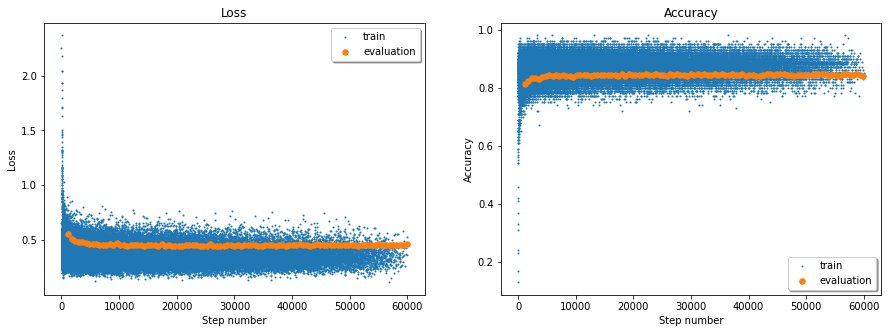

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
ax[0].scatter(for_plot_x, for_plot_y, s = 1)
ax[0].scatter(for_plot_x_test,for_plot_y_test, s = 30)
ax[0].set_title('Loss')
ax[0].set_xlabel('Step number')
ax[0].set_ylabel('Loss')
ax[0].legend(('train', 'evaluation'), loc='upper right', shadow=True)
ax[1].scatter(for_plot_x1, for_plot_y1, s = 1)
ax[1].scatter(for_plot_x_test1,for_plot_y_test1, s = 30)
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Step number')
ax[1].set_ylabel('Accuracy')
ax[1].legend(('train', 'evaluation'), loc='lower right', shadow=True)

### Моя первая нейросеть (4 балла)

В данной секции вам нужно сделать следующие вещи: 

* Реализовать три разных архитектуры нейросетей. Эти архитектуры должны принципиально отличаться друг от друга. Разрешается одной из архитекур брать полностью полносвязную модель. Остальные две должны быть сверточными и сильно отличаться друг от друга. К примеру, одна из таких архитектур может быть VGG подобная сеть, а другая ResNet подобная архитектура. 

* Написать цикл для обучения которым можно обучать все три модели без изменений кода

* Попробовать каждую модель с двумя оптимизаторами: RMSprop и SGD with momentum

* Визуализировать результаты перфоманса каждой модели (две метрики минимум для каждого сетапа, например, лосс и долю правильных ответов). В данном пункте мы ждем от вас визуализацию зависимости метрики от номера итерации обучения.

* Сделать выводы какие были модели были лучше и как вы думаете почему?

##Цикл обучения и модели


In [41]:
def train_model( model, train_dataloader, eval_dataloader, optimizer, epochs):
  model.to('cuda')
  loss = nn.CrossEntropyLoss()
  best_loss = []
  best_accuracy = []
  for_plot_x = []
  for_plot_y = []
  for_plot_x_test = []
  for_plot_y_test = []
  for_plot_x_test1 = []
  for_plot_y_test1 = []
  for_plot_x1 = []
  for_plot_y1 = []
  all_test = 0
  k = 0
  for epoch in range(epochs):
      current_loss = 0
      current_loss1 = 0
      right_answers = 0
      all_answers = 0
      i = 0
      loss_test = 0
      cnt_test = 0
      for batch in train_dataloader:
          imgs, cls = batch
          imgs, cls = imgs.to('cuda'), cls.to('cuda')
          optimizer.zero_grad()
          y_pred = model(imgs)
          output = loss(y_pred, cls)
          output.backward()
          optimizer.step()

          values, indicies  = y_pred.max(axis =1)
          right_answers = ((indicies - cls)==0).sum().item()
          all_answers = len(indicies)
          current_accuracy = right_answers/all_answers
          current_loss += output.item()
          current_loss1 += output.item()
          if i % 10 == 9:
                for_plot_x.append(k + (i+1))
                for_plot_y.append(current_loss1/10)
                for_plot_x1.append(k + (i+1))
                for_plot_y1.append(current_accuracy)
                current_loss1 = 0
          if i % 200 == 199:
                print('[{},{}], loss_train:{}, accuracy_train:{}'.format(epoch + 1, i + 1, current_loss/200, current_accuracy ))
                current_loss = 0
                
          
          i+=1
      k +=i
      with torch.no_grad():
        right_answers_test = 0
        all_answers_test = 0

        for batch in eval_dataloader:
          imgs, cls = batch
          imgs, cls = imgs.to('cuda'), cls.to('cuda')
          y_pred = model(imgs)
          values, indicies  = y_pred.max(axis =1)
          right_answers_test += ((indicies - cls)==0).sum().item()
          all_answers_test += len(indicies)
          output1 = loss(y_pred, cls)
          loss_test += output1.item()
          cnt_test += 1
        accuracy_test = right_answers_test/all_answers_test
        for_plot_y_test1.append(accuracy_test)
        for_plot_x_test1.append(k)
        for_plot_x_test.append(k)
        for_plot_y_test.append(loss_test/cnt_test)
        best_accuracy.append(accuracy_test)
        best_loss.append(loss_test/cnt_test)
      clear_output()

      fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
      ax[0].scatter(for_plot_x, for_plot_y)
      ax[0].scatter(for_plot_x_test,for_plot_y_test, s = 10**2)
      ax[0].set_title('Loss')
      ax[0].set_xlabel('Step number')
      ax[0].set_ylabel('Loss')
      ax[0].legend(('train', 'evaluation'), loc='upper right', shadow=True)
      ax[1].scatter(for_plot_x1, for_plot_y1)
      ax[1].scatter(for_plot_x_test1,for_plot_y_test1, s = 10**2)
      ax[1].set_title('Accuracy')
      ax[1].set_xlabel('Step number')
      ax[1].set_ylabel('Accuracy')
      ax[1].legend(('train', 'evaluation'), loc='lower right', shadow=True)
      plt.show()
      print('Loss last batch train:{}'.format(output.item()))
      print('Loss_evaluation:{}'.format(loss_test/cnt_test))
      print('Accuracy last batch train:{}'.format(current_accuracy))
      print('Accuracy_evaluation:{}'.format(accuracy_test))
  print('Best_loss_evaluation:{}'.format(min(for_plot_y_test)))
  print('Best_accuracy_evaluation:{}'.format(max(for_plot_y_test1)))


In [47]:
class FCModel(nn.Module):
    def __init__(self):
        super(FCModel, self).__init__()
        self.lin1 = nn.Linear(28*28, 392)
        self.norm1 = nn.BatchNorm1d(392)
        self.lin2 = nn.Linear(392, 196)
        self.norm2 = nn.BatchNorm1d(196)
        self.lin3 = nn.Linear(196,10)
        self.smx = nn.Softmax()
    def forward(self, x):
        x = nn.Flatten()(x)
        x = torch.relu(self.lin1(x))
        x = torch.relu(self.lin2(x))
        x = self.lin3(x)
        x = self.smx(x)
        return x

In [59]:
VGG = nn.Sequential(
    nn.Conv2d(1, 32, 3 ,padding = 1),
    nn.BatchNorm2d(32),
    nn.Dropout2d(0.25),
    nn.ReLU(),
    nn.Conv2d(32, 32, 3, padding = 1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(2),

    nn.Conv2d(32, 64, 3 ,padding = 1),
    nn.BatchNorm2d(64),
    nn.Dropout2d(0.25),
    nn.ReLU(),
    nn.Conv2d(64, 64, 3, padding = 1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2),

    nn.Conv2d(64, 128, 3 ,padding = 1),
    nn.BatchNorm2d(128),
    nn.Dropout2d(0.25),
    nn.ReLU(),
    nn.Conv2d(128, 128, 3, padding = 1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2),

    nn.Flatten(),
    nn.Linear(1152,576),
    nn.BatchNorm1d(576),
    nn.Dropout(0.25),
    nn.ReLU(),
    nn.Linear(576,10),
    nn.Softmax()



)

In [44]:
class Resnet(nn.Module):
    def __init__(self):
        super(Resnet, self).__init__()
        self.conv1 = nn.Conv2d(1, 14, 3 ,padding = 1)
        self.bn1 = nn.BatchNorm2d(14)
        self.bn2 = nn.BatchNorm2d(28)
        self.bn3 = nn.BatchNorm2d(56)
        #self.bn4 = nn.BatchNorm1d(1378)
        self.ap1 = nn.AvgPool2d(7)
        self.conv2 = nn.Conv2d(14, 14, 3 ,padding = 1)
        self.conv3 = nn.Conv2d(14, 28, 3 ,padding = 1, stride = 2)
        self.conv4 = nn.Conv2d(28, 28, 3 ,padding = 1)
        self.conv5 = nn.Conv2d(28, 56, 3 ,padding = 1, stride = 2)
        self.conv6 = nn.Conv2d(56, 56, 3 ,padding = 1)
        self.lin1 = nn.Linear(56,10)
        self.relu = nn.ReLU()
        self.smx = nn.Softmax()
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x_shortcut = x
        x = self.conv2(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = x + x_shortcut
        x_shortcut = self.conv3(x)
        x = self.conv3(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.conv4(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = x + x_shortcut
        x_shortcut = self.conv5(x)
        x = self.conv5(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.conv6(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = x + x_shortcut
        x = self.ap1(x)
        x = nn.Flatten()(x)
        x = self.lin1(x)      
        x = self.smx(x)         
        return x

##Обучение моделей с помощью SGD и RMSProp

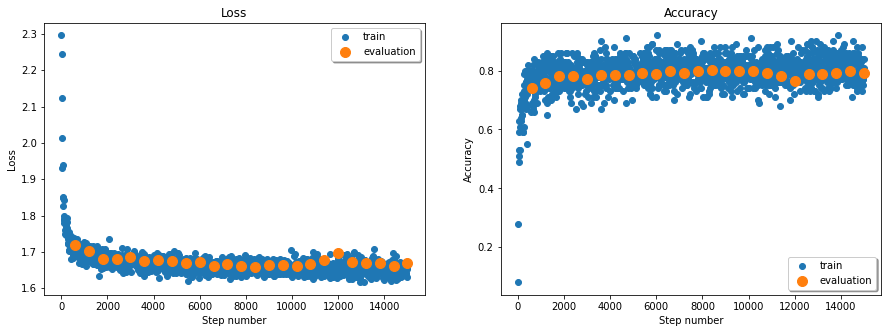

Loss last batch train:1.6222283840179443
Loss_evaluation:1.6685108077526092
Accuracy last batch train:0.84
Accuracy_evaluation:0.7921
Best_loss_evaluation:1.6598694598674775
Best_accuracy_evaluation:0.8007


In [49]:
#Модель с полносвзяными слоями с SGD
model = FCModel()
optimizer = optim.SGD(model.parameters(), lr = 1, momentum=0.2)
train_model(model, train_dataloader, eval_dataloader, optimizer , epochs = 25)

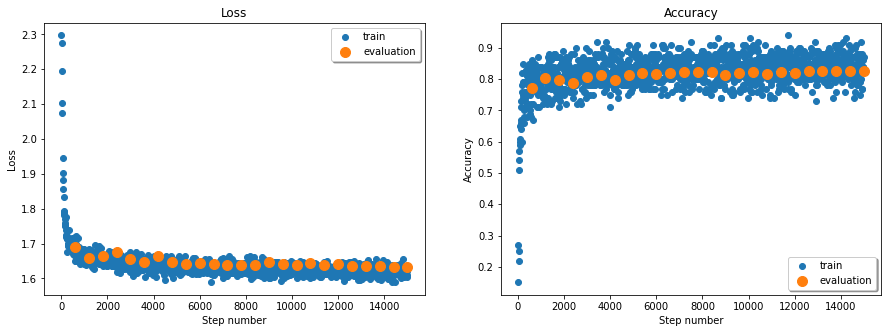

Loss last batch train:1.590512752532959
Loss_evaluation:1.6338300323486328
Accuracy last batch train:0.87
Accuracy_evaluation:0.8271
Best_loss_evaluation:1.6338300323486328
Best_accuracy_evaluation:0.8271


In [52]:
#Модель с полносвзяными слоями с RMSProp
model = FCModel()
optimizer = optim.RMSprop(model.parameters(), lr = 0.9, eps = 1)
train_model(model, train_dataloader, eval_dataloader, optimizer , epochs = 25)

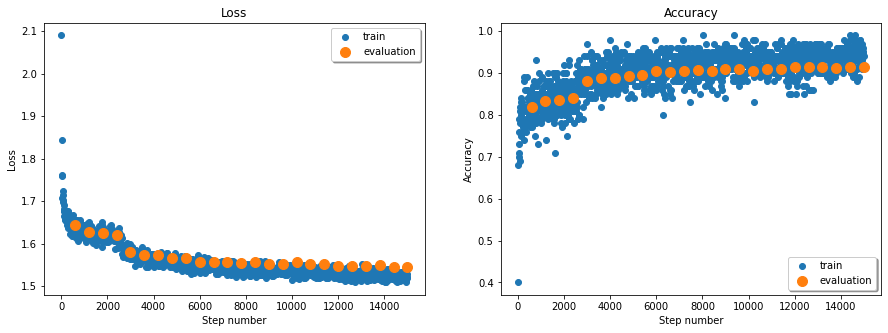

Loss last batch train:1.5428993701934814
Loss_evaluation:1.545695765018463
Accuracy last batch train:0.92
Accuracy_evaluation:0.9147
Best_loss_evaluation:1.5451040971279144
Best_accuracy_evaluation:0.9154


In [53]:
#VGG-подобная модель с SGD
#нужно перезадавать VGG каждый запуск, чтоб не продолжала обучение, а начинала заново 
model = VGG
optimizer = optim.SGD(model.parameters(), lr = 1, momentum=0.2)
train_model(model, train_dataloader, eval_dataloader, optimizer = optimizer, epochs = 25)

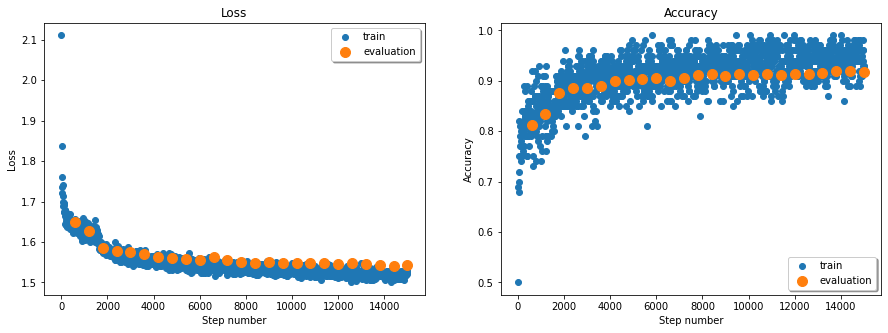

Loss last batch train:1.531769871711731
Loss_evaluation:1.5437538862228393
Accuracy last batch train:0.93
Accuracy_evaluation:0.9173
Best_loss_evaluation:1.5407416832447052
Best_accuracy_evaluation:0.9203


In [60]:
#VGG-подобная модель с RMSProp
#нужно перезадавать VGG каждый запуск, чтоб она не продолжала обучение, а начинала заново
model = VGG
optimizer = optim.RMSprop(model.parameters(), lr = 0.9, eps = 1)
train_model(model, train_dataloader, eval_dataloader, optimizer = optimizer, epochs = 25)

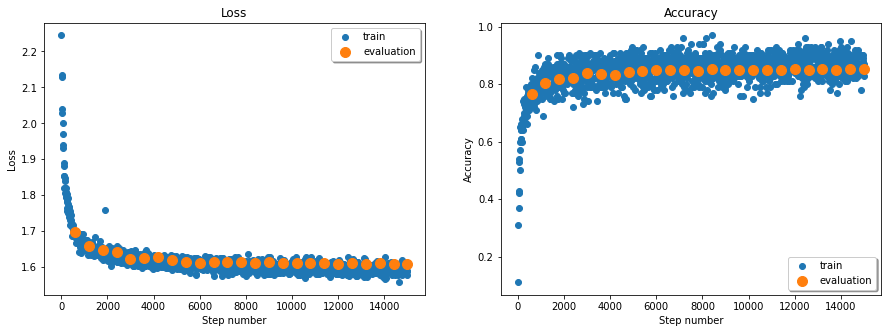

Loss last batch train:1.6363029479980469
Loss_evaluation:1.6090905022621156
Accuracy last batch train:0.83
Accuracy_evaluation:0.8513
Best_loss_evaluation:1.607748681306839
Best_accuracy_evaluation:0.8538


In [57]:
#Resnet-подобная модель с SGD
model = Resnet()
optimizer = optim.SGD(model.parameters(), lr = 1, momentum=0.1)
train_model(model, train_dataloader, eval_dataloader, optimizer , epochs = 25)

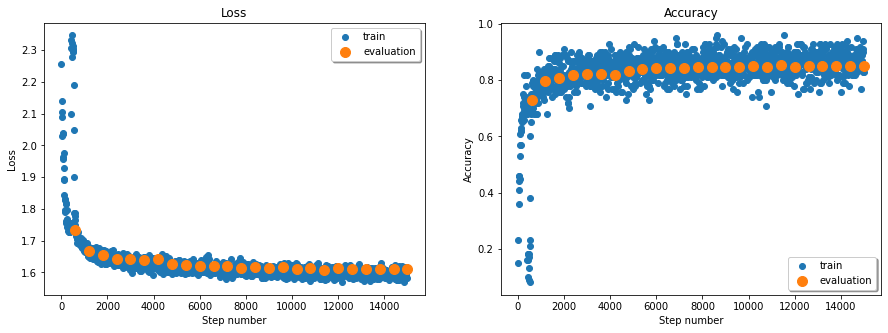

Loss last batch train:1.6066898107528687
Loss_evaluation:1.6120307123661042
Accuracy last batch train:0.85
Accuracy_evaluation:0.8495
Best_loss_evaluation:1.6088635623455048
Best_accuracy_evaluation:0.8535


In [58]:
#Resnet-подобная модель с RMSProp
model = Resnet()
optimizer = optim.RMSprop(model.parameters(), lr = 0.9, eps = 1)
train_model(model, train_dataloader, eval_dataloader, optimizer , epochs = 25)

Ожидаемо быстрее всех учится модель, где нет сверток, а только полносвзяные слои, за счет своей простоты, но при этом выдает наихудшие результаты среди всех моделей. На VGG-подобной модели обучение происходит лучше всего, поскольку, на мой взгляд, она имеет структуру оптимальную (не слишком сложную и не слишком простую) для данной задачи. Resnet-подобная модель превосходит линейную модель, однако уступает VGG-подобной. Я связываю это с тем, что задача чересчур простая (заранее подготовленный набор чб картинок небольшого размера, всего 28x28, с хорошим расположением объектов ) для того чтоб использовать сложные модели. Возможно, даже в такой простой форме Resnet-подобная модель уже слишком сложна. 

Ниже посмотрим лучшие показатели точности, которые удалось получить для 25 эпох обучения с батчами размера 100:

SGD:

*   FC: 80.07 %
*   VGG: 91.54 %
*   Resnet:85.38 %

RMSProp:

*   FC: 82.71 %
*   VGG: 92.03 %
*   Resnet: 85.35 %

В итоге, можно еще было бы поработать над гиперпарметрами или поучить подольше (тут не очень большой потенциал), чтоб улучшить качество, но в целом VGG-модель весьма неплохо обучилась. Для Resneta скорее всего есть проблемы с оптимальностью структуры самой нейросети для конкретной задачи. Есть простор для совершенствования!

